# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front

## Get the data 

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza 🍕 and steak 🥩) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [1]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("./data/pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in './data/pizza_steak'.
There are 2 directories and 0 images in './data/pizza_steak\test'.
There are 0 directories and 250 images in './data/pizza_steak\test\pizza'.
There are 0 directories and 250 images in './data/pizza_steak\test\steak'.
There are 2 directories and 0 images in './data/pizza_steak\train'.
There are 0 directories and 750 images in './data/pizza_steak\train\pizza'.
There are 0 directories and 750 images in './data/pizza_steak\train\steak'.


In [2]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("./data/pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [3]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path('./data/pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from the subdirector
print(class_names)

['pizza' 'steak']


In [4]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

['1620560.jpg']
Image shape: (512, 512, 3)


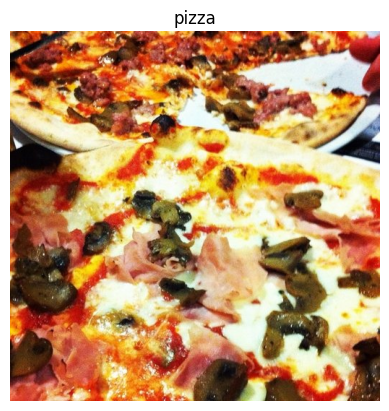

In [5]:
# View a random image from the training dataset
img = view_random_image(target_dir='./data/pizza_steak/train/',
                        target_class='pizza')

In [6]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [7]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[202, 131,  69],
        [200, 130,  70],
        [199, 130,  75],
        ...,
        [201, 208, 237],
        [200, 199, 233],
        [202, 196, 232]],

       [[206, 130,  72],
        [187, 112,  55],
        [169,  98,  46],
        ...,
        [203, 207, 236],
        [201, 196, 228],
        [198, 188, 222]],

       [[203, 120,  66],
        [173,  93,  40],
        [147,  71,  22],
        ...,
        [202, 198, 221],
        [202, 188, 214],
        [196, 177, 205]],

       ...,

       [[241, 104,  70],
        [240, 101,  68],
        [235,  96,  65],
        ...,
        [153, 108,  89],
        [ 75,  28,  10],
        [ 82,  35,  17]],

       [[234,  95,  64],
        [228,  89,  58],
        [231,  90,  60],
        ...,
        [130,  85,  66],
        [ 86,  39,  21],
        [ 84,  37,  19]],

       [[231,  92,  61],
        [218,  79,  48],
        [222,  79,  49],
        ...,
        [129,  84,  6

In [8]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

> 🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255.

In [9]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.79215686, 0.51372549, 0.27058824],
        [0.78431373, 0.50980392, 0.2745098 ],
        [0.78039216, 0.50980392, 0.29411765],
        ...,
        [0.78823529, 0.81568627, 0.92941176],
        [0.78431373, 0.78039216, 0.91372549],
        [0.79215686, 0.76862745, 0.90980392]],

       [[0.80784314, 0.50980392, 0.28235294],
        [0.73333333, 0.43921569, 0.21568627],
        [0.6627451 , 0.38431373, 0.18039216],
        ...,
        [0.79607843, 0.81176471, 0.9254902 ],
        [0.78823529, 0.76862745, 0.89411765],
        [0.77647059, 0.7372549 , 0.87058824]],

       [[0.79607843, 0.47058824, 0.25882353],
        [0.67843137, 0.36470588, 0.15686275],
        [0.57647059, 0.27843137, 0.08627451],
        ...,
        [0.79215686, 0.77647059, 0.86666667],
        [0.79215686, 0.7372549 , 0.83921569],
        [0.76862745, 0.69411765, 0.80392157]],

       ...,

       [[0.94509804, 0.40784314, 0.2745098 ],
        [0.94117647, 0.39607843, 0.26666667],
        [0.92156863, 0

## An end-to-end example 

Let's build a convolutional neural network to find patterns in our images, more specifically we a need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "./data/pizza_steak/train"
test_dir = "./data/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN mmodel (same as the Tiny VGG on the CNN explainer websit)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 18s 367ms/step - loss: 0.6588 - accuracy: 0.5887 - val_loss: 0.5911 - val_accuracy: 0.6860
Epoch 2/5
47/47 [==============================] - 17s 360ms/step - loss: 0.5347 - accuracy: 0.7340 - val_loss: 0.4074 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 17s 364ms/step - loss: 0.4518 - accuracy: 0.7880 - val_loss: 0.3504 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 17s 363ms/step - loss: 0.4081 - accuracy: 0.8233 - val_loss: 0.3575 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 17s 362ms/step - loss: 0.3774 - accuracy: 0.8340 - val_loss: 0.3395 - val_accuracy: 0.8760


> 🤔 **Note:** If the cell above takes more than ~12 seconds per epoch to run, you might not be using a GPU accelerator. If you're using a Colab notebook, you can access a GPU accelerator by going to Runtime -> Change Runtime Type -> Hardware Accelerator and select "GPU". After doing so, you might have to rerun all of the above cells as changing the runtime type causes Colab to have to reset.

In [11]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

What do you notice about the names of `model_1`'s layers and the layer names at the top of the [CNN explainer website](https://poloclub.github.io/cnn-explainer/)?

I'll let you in on a little secret: we've replicated the exact architecture they use for their model demo.

Look at you go! **You're already starting to replicate models you find in the wild**.

Now there are a few new things here we haven't discussed, namely:

* The `ImageDataGenerator` class and the rescale parameter
* The `flow_from_directory()` method
    * The `batch_size` parameter
    * The `target_size` parameter
* `Conv2D` layers (and the parameters which come with them)
* `MaxPool2D` layers (and their parameters).
* The `steps_per_epoch` and `validation_steps` parameters in the `fit()` function

Before we dive into each of these, let's see what happens if we try to fit a model we've worked with previously to our data.

## Using the same model as before

To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

> 🔑 **Note:** If you haven't gone through the previous classification notebook, no troubles, we'll be bringing in the a simple 4 layer architecture used to separate dots replicated from the [TensorFlow Playground environment](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.75075&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

We can use all of the same parameters in our previous model except for changing two things:

* **The data** - we're now working with images instead of dots.
* **The input shape** - we have to tell our neural network the shape of the images we're working with.
    * A common practice is to reshape images all to one size. In our case, we'll resize the images to `(224, 224, 3)`, meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [12]:
train_data

In [13]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 3s 67ms/step - loss: 0.8732 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 3s 64ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 3s 65ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 3s 65ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 3s 63ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [14]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it

In [15]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 135ms/step - loss: 4.4326 - accuracy: 0.5980 - val_loss: 0.7992 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 6s 132ms/step - loss: 0.7931 - accuracy: 0.7260 - val_loss: 0.5102 - val_accuracy: 0.7560
Epoch 3/5
47/47 [==============================] - 6s 132ms/step - loss: 0.6200 - accuracy: 0.7500 - val_loss: 0.4968 - val_accuracy: 0.7840
Epoch 4/5
47/47 [==============================] - 6s 133ms/step - loss: 0.6166 - accuracy: 0.7420 - val_loss: 0.6272 - val_accuracy: 0.6700
Epoch 5/5
47/47 [==============================] - 6s 133ms/step - loss: 0.6506 - accuracy: 0.7320 - val_loss: 0.6680 - val_accuracy: 0.7220


In [16]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
15000000/31000

483.8709677419355

In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Binary Classification: Let's break it down

We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

Let's step through each.

### 1. Become one with the data

['3916407.jpg']
Image shape: (342, 512, 3)
['967694.jpg']
Image shape: (512, 512, 3)


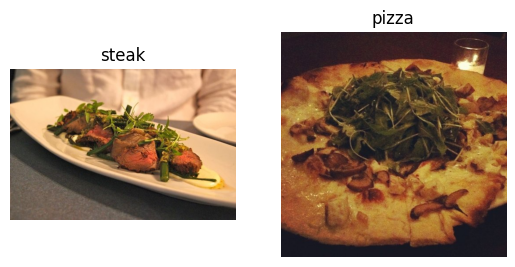

In [19]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("./data/pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("./data/pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [20]:
# Define directory dataset paths
train_dir = "./data/pizza_steak/train/"
test_dir = "./data/pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:

1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for our health... https://x.com/ylecun/status/989610208497360896?s=20

In [21]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [22]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # type of data you're working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [24]:
# How many batches are there?
len(train_data)

47

In [25]:
1500/32

46.875

In [26]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [27]:
images[7]

array([[[0.30588236, 0.17254902, 0.227451  ],
        [0.34901962, 0.21960786, 0.25490198],
        [0.4039216 , 0.2784314 , 0.2901961 ],
        ...,
        [0.16470589, 0.02745098, 0.1137255 ],
        [0.16862746, 0.01960784, 0.11764707],
        [0.15686275, 0.00784314, 0.10588236]],

       [[0.28235295, 0.14901961, 0.20392159],
        [0.34117648, 0.21176472, 0.24705884],
        [0.42352945, 0.29803923, 0.30980393],
        ...,
        [0.17254902, 0.02352941, 0.1137255 ],
        [0.1764706 , 0.02745098, 0.11764707],
        [0.16078432, 0.01176471, 0.10980393]],

       [[0.26666668, 0.13333334, 0.19607845],
        [0.32941177, 0.20000002, 0.23529413],
        [0.42352945, 0.29803923, 0.31764707],
        ...,
        [0.19215688, 0.04313726, 0.13333334],
        [0.1764706 , 0.02745098, 0.11764707],
        [0.16862746, 0.03137255, 0.1254902 ]],

       ...,

       [[0.62352943, 0.5803922 , 0.5647059 ],
        [0.6039216 , 0.56078434, 0.54509807],
        [0.6039216 , 0

In [28]:
images[7].shape

(224, 224, 3)

In [29]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> 🔑 **Note:** In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

In [30]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [31]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=(3, 3), 
         strides=(1, 1),
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

🛠 **Practice:** Understand what's going on in a Conv2D layer by going through the CNN explainer website for 10-20 minutes:
https://poloclub.github.io/cnn-explainer/

In [32]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [33]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. Fit the model

In [34]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [35]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 451ms/step - loss: 0.9448 - accuracy: 0.6880 - val_loss: 0.4280 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 21s 444ms/step - loss: 0.4249 - accuracy: 0.8067 - val_loss: 0.4638 - val_accuracy: 0.7680
Epoch 3/5
47/47 [==============================] - 21s 439ms/step - loss: 0.3288 - accuracy: 0.8687 - val_loss: 0.3961 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 20s 426ms/step - loss: 0.1889 - accuracy: 0.9340 - val_loss: 0.3943 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 21s 440ms/step - loss: 0.0894 - accuracy: 0.9807 - val_loss: 0.5052 - val_accuracy: 0.7980


### 5. Evaluation our model

It looks like our model is learning something, let's evaluate it.

<Axes: >

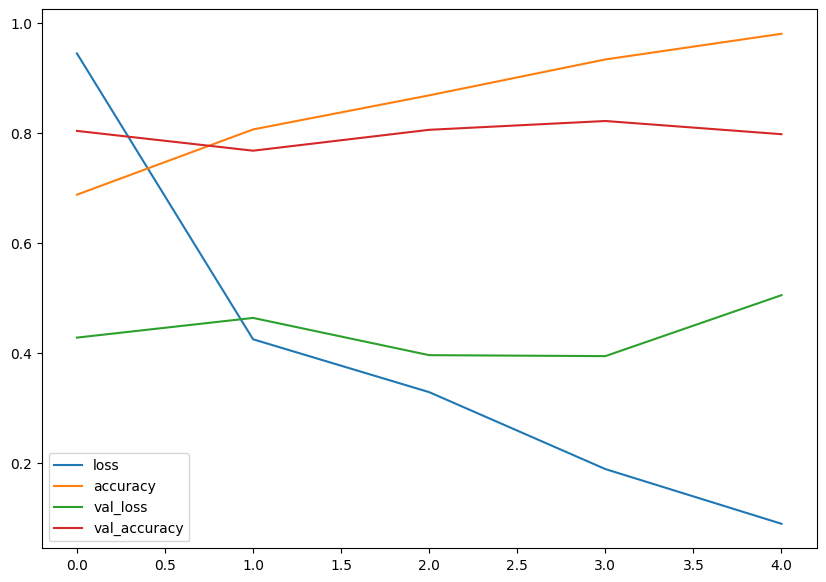

In [40]:
# Let's Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [45]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

Hmm, judging by our loss curves, it looks like our model is **overfitting** the training dataset.

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

To further inspect our model's training performance, let's separate the accuracy and loss curves.

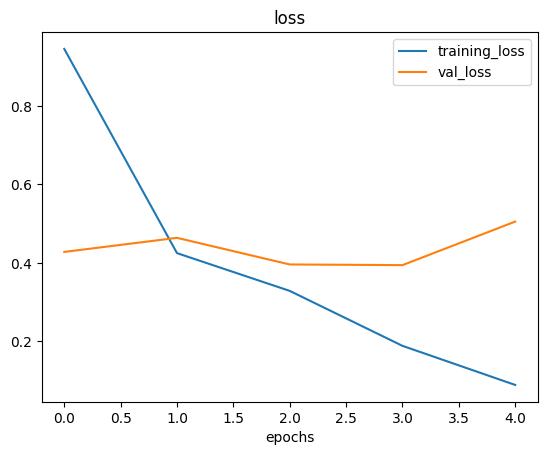

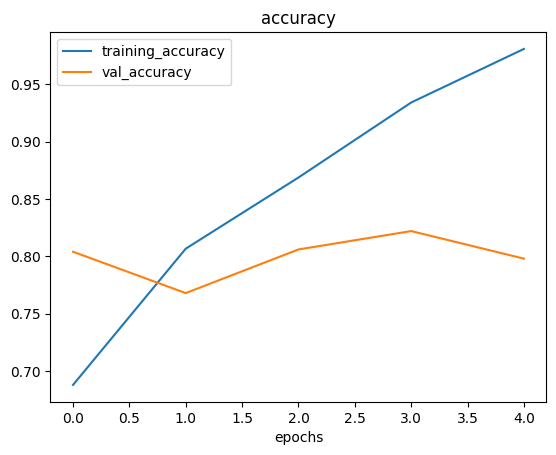

In [46]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps: 

0. Create a basline.
1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.

So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:

* Increase the number of convolutional layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattened layer.

But what we'll do instead is focus on getting our model's training curves to better align with eachother, in other words, we'll take on step 2.

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

Say we were building a pizza vs. steak food classifier app, and our model performs very well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience?

Not really...

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:

* A ConvNet with [max pooling](https://deeplizard.com/learn/video/ZjM_XQa5s6s)
* A ConvNet with max pooling and data augmentation

For the first model, we'll follow the modified basic CNN structure:

Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output
Let's built it. It'll have the same structure as `model_4` but with a `MaxPool2D()` layer after each convolutional layer.

In [56]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [57]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [58]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 161ms/step - loss: 0.6025 - accuracy: 0.6787 - val_loss: 0.4407 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 7s 157ms/step - loss: 0.4408 - accuracy: 0.7980 - val_loss: 0.3446 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 7s 158ms/step - loss: 0.3979 - accuracy: 0.8287 - val_loss: 0.3800 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 7s 158ms/step - loss: 0.3749 - accuracy: 0.8327 - val_loss: 0.3217 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 7s 158ms/step - loss: 0.3541 - accuracy: 0.8480 - val_loss: 0.3064 - val_accuracy: 0.8660


In [59]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 26, 26, 10)       

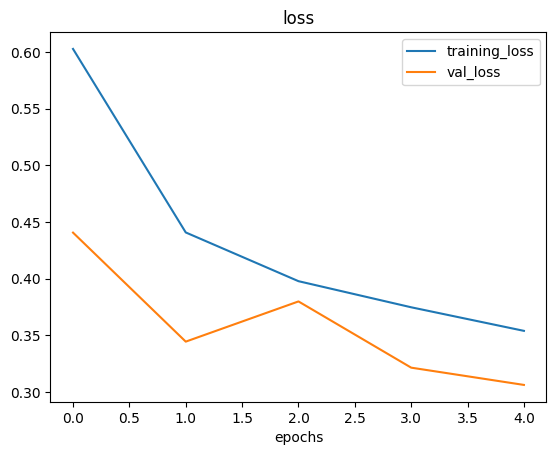

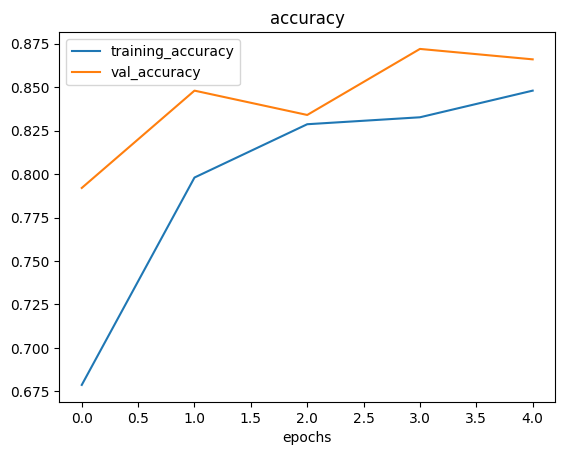

In [60]:
# Plot loss curves
plot_loss_curves(history_5)

Nice! We can see the training curves get a lot closer to eachother. However, our the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

Time to dig into our bag of tricks and try another method of overfitting prevention, data augmentation.

First, we'll see how it's done with code then we'll discuss what it's doing.

To implement data augmentation, we'll have to reinstantiate our `ImageDataGenerator` instances.

## Opening our bag of tricks and finding data augmentation

In [61]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔 **Question:** What's data augmentation?

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

In [63]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is usally only performed on the training data. Using the `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

Finally... let's visualize some augmented data!!!

In [64]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

showing image number: 7


(-0.5, 223.5, 223.5, -0.5)

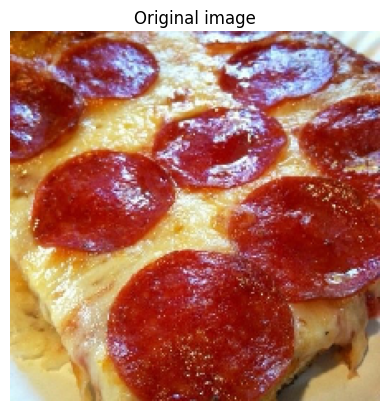

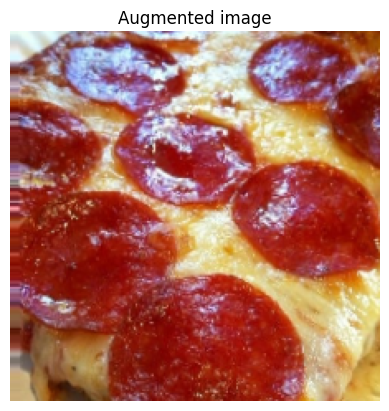

In [67]:
# Show original image and augmented image
import random
random_number = random.randint(0, 31) # our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)